<a href="https://colab.research.google.com/github/Aryan-88/Notebook-3/blob/main/3_1_Shallow_Networks_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 3.1 -- Shallow neural networks I**

The purpose of this notebook is to gain some familiarity with shallow neural networks with 1D inputs.  It works through an example similar to figure 3.3 and experiments with different activation functions. <br>

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [2]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 3.1 of the book.

In [3]:
def ReLU(preactivation):
    # ReLU function: replaces all negative values with 0, keeping positive values unchanged
    activation = np.maximum(0, preactivation)

    return activation


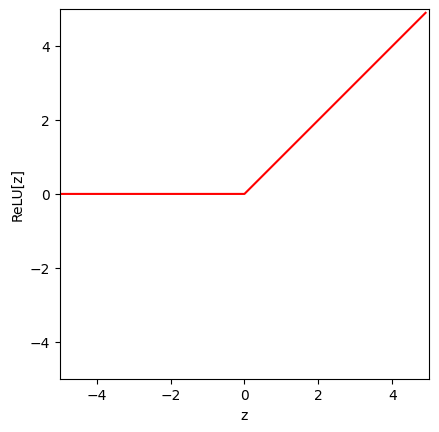

In [4]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

In [5]:
def shallow_1_1_3(x, activation_fn, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    # Compute the preactivations (linear combination of inputs and theta parameters)
    pre_1 = theta_10 + theta_11 * x
    pre_2 = theta_20 + theta_21 * x
    pre_3 = theta_30 + theta_31 * x

    # Pass these through the ReLU (or other) activation function
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    # Weight the activations using phi parameters
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    # Combine the weighted activations and add the bias term phi_0 to create the final output
    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    # Return everything we have calculated
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


In [6]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

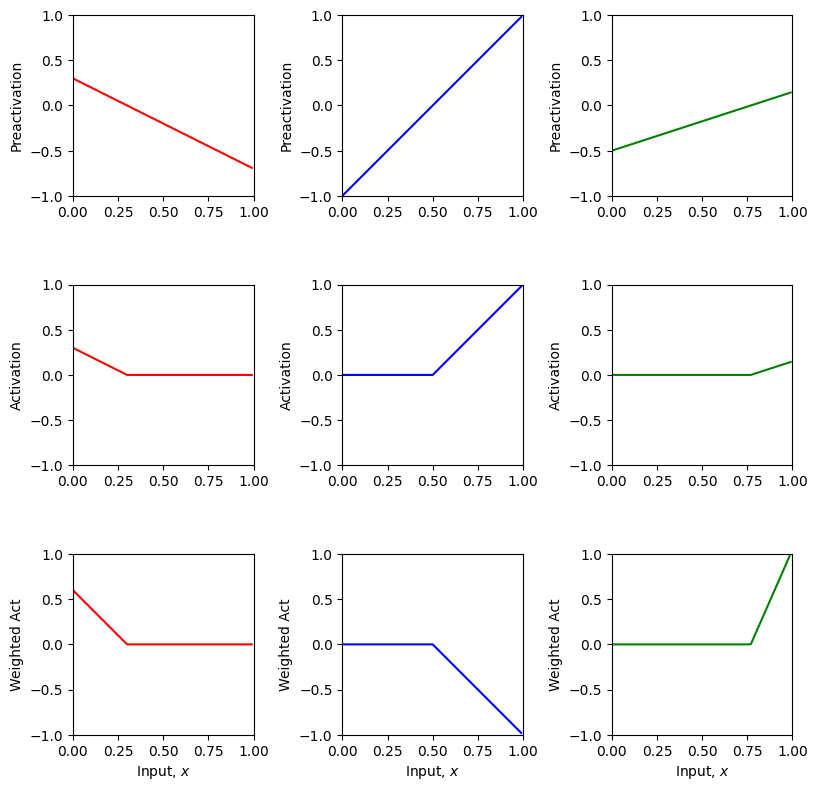

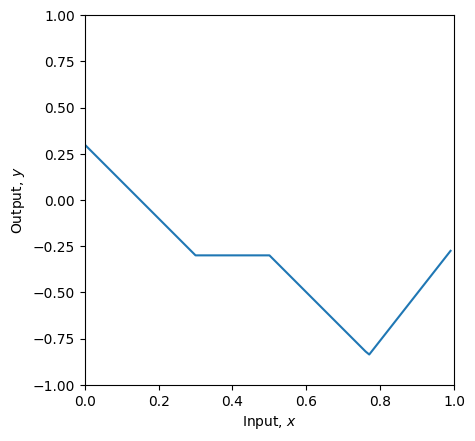

In [7]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

If your code is correct, then the final output should look like this:


Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{11} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

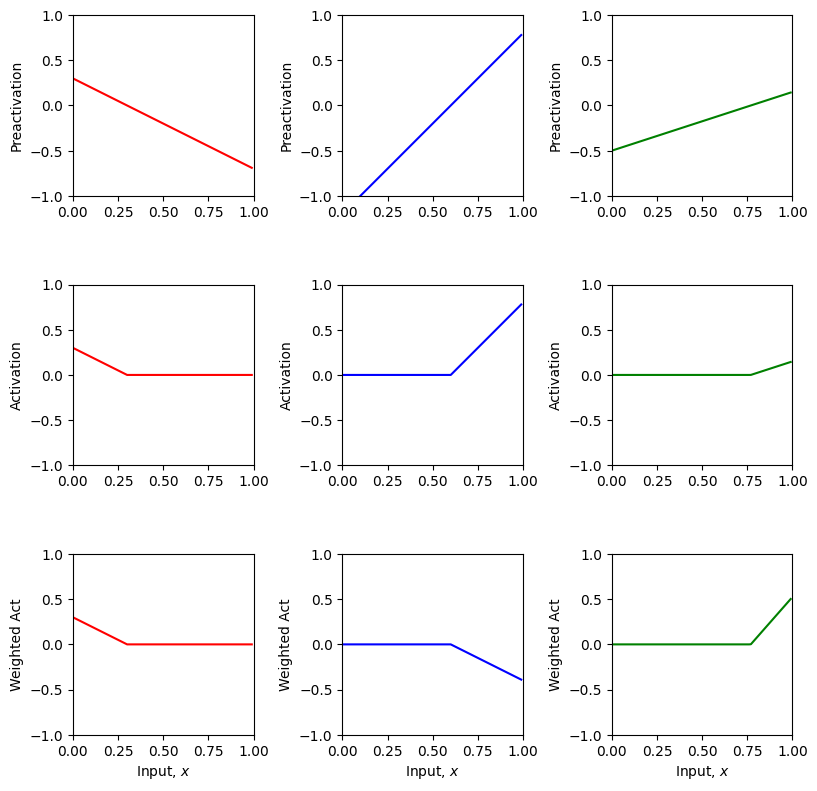

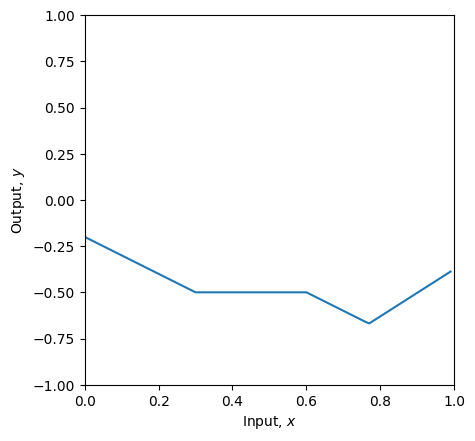

In [8]:
# Example: modifying phi_0
phi_0 = -0.5 # Change as needed
# Example: multiplying phi_1, phi_2, phi_3 by 0.5
phi_1 *= 0.5
phi_2 *= 0.5
phi_3 *= 0.5
# Example: modifying theta_20
theta_20 = -1.2 # Change to test effects
# Example: other modifications to test predictions

# Re-run the network with modified parameters
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot to visualize the results
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)


# Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\text{f}[x_{i},\boldsymbol\phi])^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\text{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model

In [9]:
# Least squares loss function
def least_squares_loss(y_train, y_predict):
    # Compute the sum of squared differences between the true values (y_train) and predicted values (y_predict)
    loss = np.sum((y_train - y_predict) ** 2)

    return loss


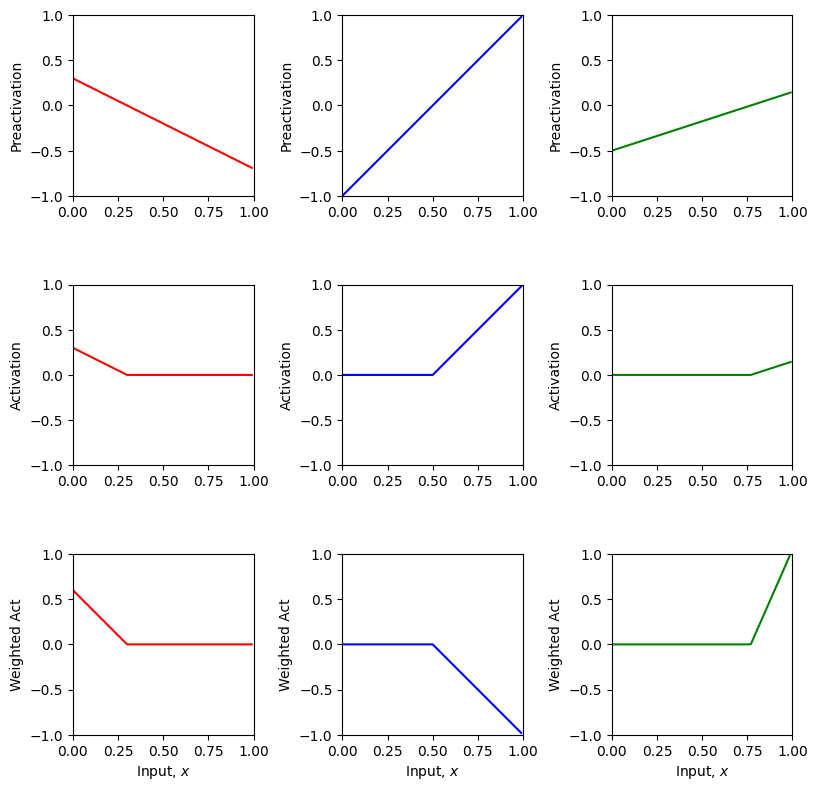

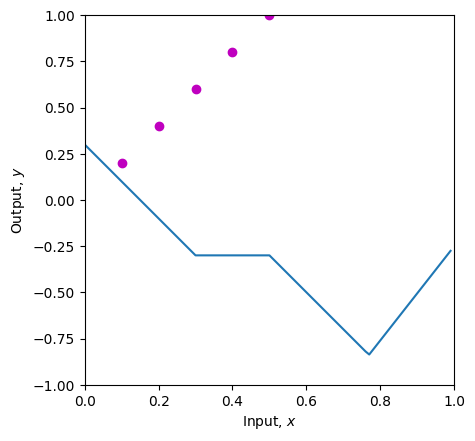

Your Loss = 3.970, True value = 9.385


In [10]:
# Define parameters and run the neural network
theta_10 =  0.3  ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3     ; phi_1 = 2.0 ; phi_2 = -1.0 ; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# Define x_train and y_train
# These are just example values. You should replace them with your actual training data.
x_train = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y_train = np.array([0.2, 0.4, 0.6, 0.8, 1.0])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the neural network
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data=x_train, y_data=y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss
loss = least_squares_loss(y_train, y_predict)
print(f'Your Loss = {loss:.3f}, True value = 9.385')